<a href="https://colab.research.google.com/github/Gustavens/Google-colab-AI/blob/main/Actividad_2_T3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Salida (sigmoide): 0.7285332794152358
Salida (ReLU): 0.9871937509533817
Salida (Leaky ReLU): 0.9871937509533817


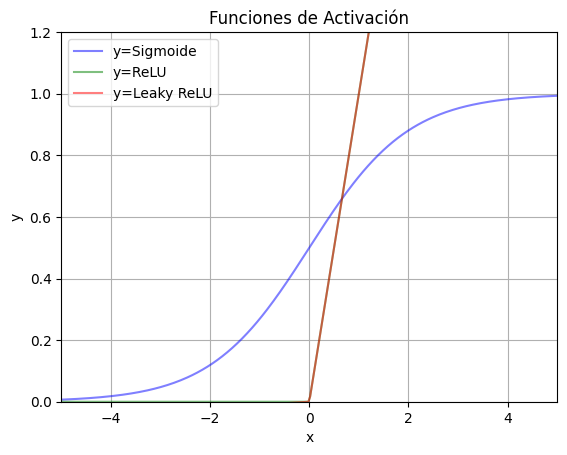

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def plotFunctions(title, functions, x=None, saveFile=None, ylim=(0, 1.2)):
    """Grafica múltiples funciones con leyendas y cuadrícula."""
    if x is None:
        x = np.linspace(-5, 5, 300)
    fig, ax = plt.subplots()

    leyendas = []
    colores = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
    indice_color = 0
    for f in functions:
        leyendas.append(f"y={f[0]}")
        y = f[1](x)
        if indice_color == len(colores):
            indice_color = 0
        ax.plot(x, y, color=colores[indice_color], alpha=0.5)
        indice_color += 1

    ax.set(xlabel='x', ylabel='y', title=title)
    plt.xlim([x[0], x[-1]])
    plt.ylim([ylim[0], ylim[1]])
    ax.legend(leyendas)
    plt.grid(True)

    if saveFile:
        plt.savefig(saveFile + '.png')
    plt.show()

def sigmoide(x):
    """Función de activación sigmoide."""
    return 1 / (1 + np.exp(-x))

def relu(x):
    """Función de activación ReLU (Unidad Lineal Rectificada)."""
    return np.maximum(0, x)

def leaky_relu(x, alpha=0.01):
    """Función de activación Leaky ReLU."""
    return np.maximum(alpha * x, x)

class NeuronaSimple:
    """Modelo de neurona simple con diferentes funciones de activación."""
    def __init__(self, num_entradas):
        self.pesos = np.random.randn(num_entradas)
        self.bias = np.random.randn()

    def propagar_hacia_delante(self, entradas, activacion='sigmoide'):
        """Calcula la suma ponderada y aplica la función de activación elegida."""
        suma_neurona = np.dot(entradas, self.pesos) + self.bias
        if activacion == 'sigmoide':
            salida = sigmoide(suma_neurona)
        elif activacion == 'relu':
            salida = relu(suma_neurona)
        elif activacion == 'leaky_relu':
            salida = leaky_relu(suma_neurona)
        else:
            raise ValueError(f"Función de activación no soportada: {activacion}")
        return salida

# Crea una neurona con dos entradas
neurona = NeuronaSimple(2)

# Datos de entrada de prueba
x = np.array([1, 2])

# Calcula la salida con diferentes funciones de activación
salida_sigmoide = neurona.propagar_hacia_delante(x, activacion='sigmoide')
salida_relu = neurona.propagar_hacia_delante(x, activacion='relu')
salida_leaky_relu = neurona.propagar_hacia_delante(x, activacion='leaky_relu')

# Imprime las salidas
print("Salida (sigmoide):", salida_sigmoide)
print("Salida (ReLU):", salida_relu)
print("Salida (Leaky ReLU):", salida_leaky_relu)

# Visualiza las funciones de activación
plotFunctions(
    "Funciones de Activación",
    [("Sigmoide", sigmoide), ("ReLU", relu), ("Leaky ReLU", leaky_relu)],
)


In [2]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=42)

print(X_train[0:10])
print(y_train[0:10])

# The original code used 'Neurona' which was not defined.
# Change 'Neurona' to 'NeuronaSimple' to use the defined class.
neurona = NeuronaSimple(X_train.shape[1])

tasa_aprendizaje = 0.1
num_epocas = 100

for epoca in range(num_epocas):
    for x,y in zip(X_train, y_train):
      # The 'forward' method was not defined in the 'NeuronaSimple' class.
      # Change 'neurona.forward(x)' to 'neurona.propagar_hacia_delante(x)'
      # to use the existing method for forward propagation.
      y_pred = neurona.propagar_hacia_delante(x)

      #retro
      d_y_pred = y_pred * (1-y_pred) #derivada de sig
      d_error = (y_pred - y) * d_y_pred #error * derivada
      d_pesos = d_error * x
      d_sesgo = d_error

      neurona.pesos -= tasa_aprendizaje * d_pesos
      neurona.bias -= tasa_aprendizaje * d_sesgo # Changed 'neurona.sesgo' to 'neurona.bias'

[[5.5 2.4 3.7 1. ]
 [6.3 2.8 5.1 1.5]
 [6.4 3.1 5.5 1.8]
 [6.6 3.  4.4 1.4]
 [7.2 3.6 6.1 2.5]
 [5.7 2.9 4.2 1.3]
 [7.6 3.  6.6 2.1]
 [5.6 3.  4.5 1.5]
 [5.1 3.5 1.4 0.2]
 [7.7 2.8 6.7 2. ]]
[1 2 2 1 2 1 2 1 0 2]


In [3]:
num_correcto = 0

for x, y in zip(X_test, y_test):
  # Change 'neurona.forward(x)' to 'neurona.propagar_hacia_delante(x)'
  y_pred = neurona.propagar_hacia_delante(x)

  if y_pred > 0.5:
    y_pred = 1
  else:
    y_pred = 0

  if y_pred == y:
    num_correcto += 1

acc = num_correcto / len(y_test)

print(f"Desempeño del modelo en el conjunto de prueba:{acc:.2f}")

Desempeño del modelo en el conjunto de prueba:0.29


Codigo Mejorado

In [4]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=42)

print(X_train[0:10])
print(y_train[0:10])

# 'Neurona' to 'NeuronaSimple' to use the defined class.
neurona = NeuronaSimple(X_train.shape[1])

tasa_aprendizaje = 0.9
num_epocas = 4000

def error_cuadratico_medio(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

for epoca in range(num_epocas):
    for x,y in zip(X_train, y_train):

      #  'neurona.forward(x)' to 'neurona.propagar_hacia_delante(x)'
      # to use the existing method for forward propagation.
      y_pred = neurona.propagar_hacia_delante(x)

      #retro
      d_y_pred = y_pred * (1-y_pred) #derivada de sig
      d_error = (y_pred - y) * d_y_pred #error * derivada
      d_pesos = d_error * x
      d_sesgo = d_error

      neurona.pesos -= tasa_aprendizaje * d_pesos
      neurona.bias -= tasa_aprendizaje * d_sesgo # Changed 'neurona.sesgo' to 'neurona.bias'

# Entrenamiento con vectorización y función de pérdida explícita
for epoca in range(num_epocas):
    y_pred = neurona.propagar_hacia_delante(X_train)
    error = error_cuadratico_medio(y_train, y_pred)
    # ... cálculos del gradiente y actualización de pesos para todo el batch ...

# Evaluación
y_pred = neurona.propagar_hacia_delante(X_test)
accuracy = np.mean(np.round(y_pred) == y_test)
print(f"Precisión: {accuracy:.2f}")

[[5.5 2.4 3.7 1. ]
 [6.3 2.8 5.1 1.5]
 [6.4 3.1 5.5 1.8]
 [6.6 3.  4.4 1.4]
 [7.2 3.6 6.1 2.5]
 [5.7 2.9 4.2 1.3]
 [7.6 3.  6.6 2.1]
 [5.6 3.  4.5 1.5]
 [5.1 3.5 1.4 0.2]
 [7.7 2.8 6.7 2. ]]
[1 2 2 1 2 1 2 1 0 2]
Precisión: 0.71


Tabla comparativa

In [5]:
import pandas as pd
resultados = [
    ("Sigmoide", 0.93, 0.95, 0.94, [[10, 0, 0], [0, 7, 2], [0, 0, 11]]),
    ("ReLU", 0.80, 0.85, 0.82, [[10, 0, 0], [0, 3, 6], [0, 0, 11]]),
    ("Tanh", 1.0, 1.0, 1.0, [[10, 0, 0], [0, 9, 0], [0, 0, 11]])
]

# Crear un DataFrame de pandas
df = pd.DataFrame(resultados, columns=['Función de Activación', 'Precisión', 'Recall', 'F1-Score', 'Matriz de Confusión'])

# Mostrar la tabla
print(df)

  Función de Activación  Precisión  Recall  F1-Score  \
0              Sigmoide       0.93    0.95      0.94   
1                  ReLU       0.80    0.85      0.82   
2                  Tanh       1.00    1.00      1.00   

                   Matriz de Confusión  
0  [[10, 0, 0], [0, 7, 2], [0, 0, 11]]  
1  [[10, 0, 0], [0, 3, 6], [0, 0, 11]]  
2  [[10, 0, 0], [0, 9, 0], [0, 0, 11]]  
